# Linear Regression - Project Exercise

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline   

## Get the Data

We'll work with the Insurance Data csv file.

** Read in the Insurance Data csv file as a DataFrame called insurance.**

In [56]:
insurance = pd.read_csv('insurancedata.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [57]:
insurance.head()

,district,region,spendtype,percapgdp,avgcancerspend
0,1,North,Insurance,54822.32372,354097.0520
1,2,North,Insurance,44447.65969,423805.8963
2,3,North,Insurance,47444.91232,339665.6173
3,4,North,Insurance,40322.25256,384887.2437
4,5,North,Insurance,49366.17764,362895.3526


In [58]:
insurance.describe()

# avgcancerspend  is a dependent var Y
# district is a nominal data 
# contiuous var-percapgdp	avgcancerspend

,district,percapgdp,avgcancerspend
count,620.000000,620.000000,620.000000
mean,310.500000,45030.381745,378023.611985
std,179.122863,10363.028564,136983.995348
min,1.000000,19154.741670,119999.545400
25%,155.750000,37054.194693,263714.761025
50%,310.500000,47180.536255,393918.785100
75%,465.250000,52953.185985,490550.758725
max,620.000000,68366.672160,644532.690500


In [59]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 5 columns):
district          620 non-null int64
region            620 non-null object
spendtype         620 non-null object
percapgdp         620 non-null float64
avgcancerspend    620 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 24.3+ KB


In [60]:
region = pd.get_dummies(insurance['region'])

In [61]:
insurance['East'] = region['East']
insurance['North'] = region['North']
insurance['South'] = region['South']
insurance.drop('region',axis=1,inplace=True)
insurance.head()

,district,spendtype,percapgdp,avgcancerspend,East,North,South
0,1,Insurance,54822.32372,354097.0520,0,1,0
1,2,Insurance,44447.65969,423805.8963,0,1,0
2,3,Insurance,47444.91232,339665.6173,0,1,0
3,4,Insurance,40322.25256,384887.2437,0,1,0
4,5,Insurance,49366.17764,362895.3526,0,1,0


## Exploratory Data Analysis

**Let's explore the data!**

In [62]:
sns.set_palette("BrBG")  
sns.set_style('whitegrid')

C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


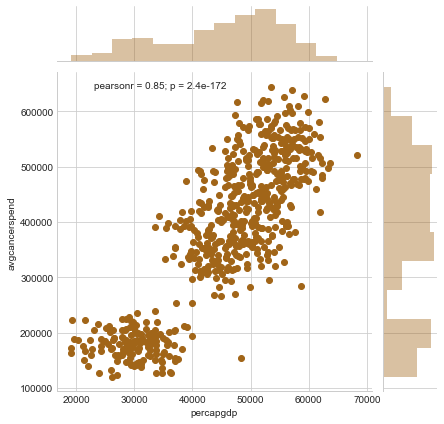

In [64]:
# More time on site, more money spent.

#sns.jointplot(x='avgcancerspend',y='percapgdpd',data=insurance)

sns.jointplot(x='percapgdp',y='avgcancerspend',data=insurance)
#0.85 pearson value is good
# p value is 2.4e is less than 0.5 ( higher the correlation less the pvalue)

#

** Do the same but with the Time on App column instead. **

C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


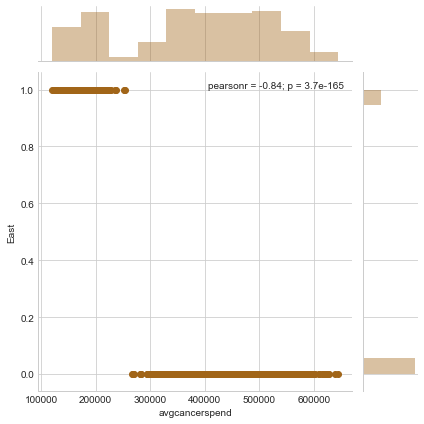

In [65]:
sns.jointplot(x='avgcancerspend',y='East',data=insurance)


C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


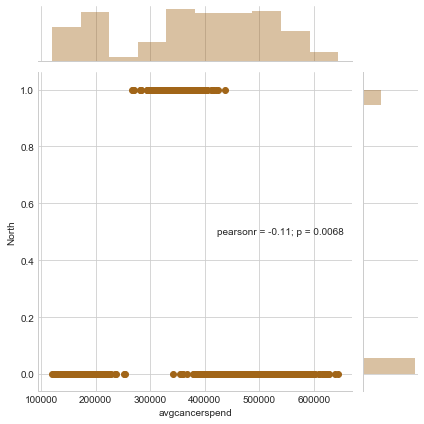

In [66]:
sns.jointplot(x='avgcancerspend',y='North',data=insurance)

C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


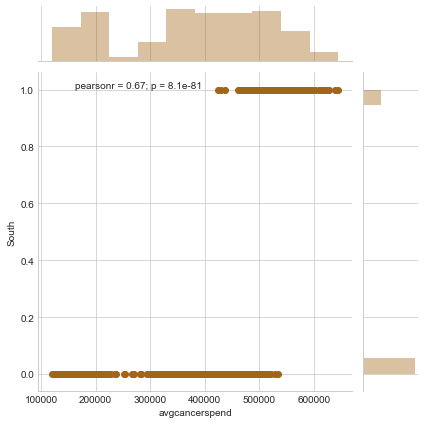

In [67]:
sns.jointplot(x='avgcancerspend',y='South',data=insurance)

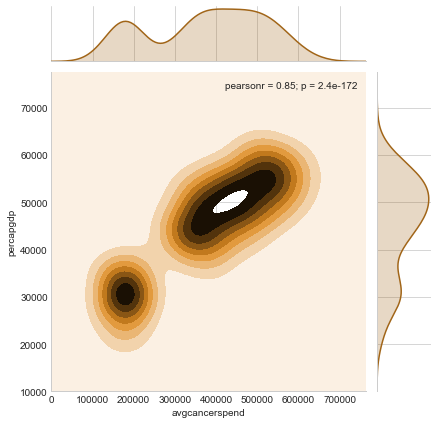

In [68]:
sns.jointplot(x='avgcancerspend',y='percapgdp',kind='kde',data=insurance)

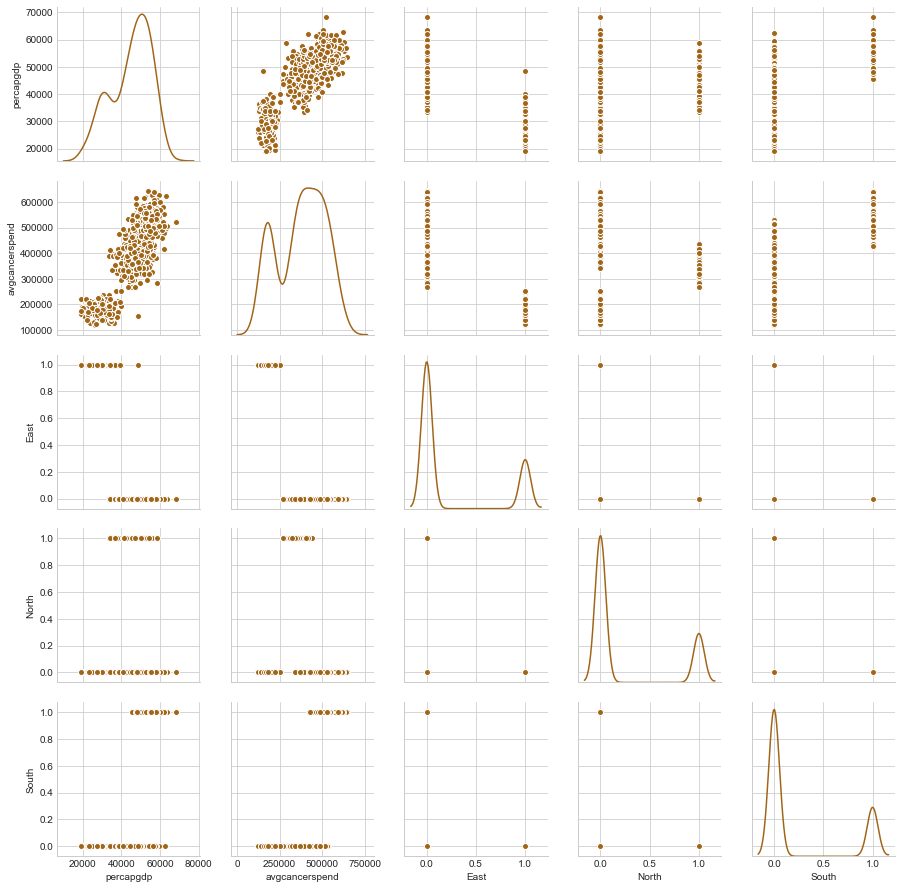

In [69]:
sns.pairplot(insurance[['percapgdp', 'avgcancerspend', 'East', 'North', 'South']],diag_kind='kde')


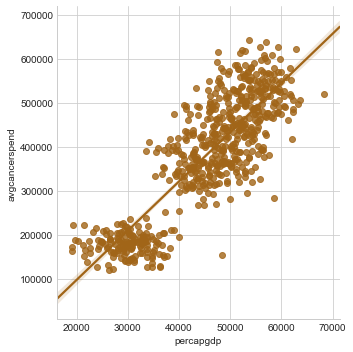

In [70]:
sns.lmplot(x='percapgdp',y='avgcancerspend',data=insurance)


## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable y equal to dependent variable and the rest as X-Independent Variables **

In [78]:
y = insurance['avgcancerspend']

In [79]:
# X = insurance[['percapgdp', 'East', 'North', 'South']]

X1 = insurance[['percapgdp']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 or 30%**

In [80]:
from sklearn.model_selection import train_test_split   
#sklearn.midel selection ....splits train and test data  ( for time series u should not use train_test_plit)

In [81]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=100)

#  test_size = 30%n(standard industry best practice , random_state is set seed value - how many time u run same set of data train and test data ) )

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [83]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [84]:
#lm = LinearRegression()
lm1 =  LinearRegression()

** Train/fit lm on the training data.**

In [85]:
#lm.fit(X_train,y_train)
lm1.fit(X_train,y_train)
# fit the dependent nd independet data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [86]:
# The coefficients
print('Coefficients: \n ', lm1.coef_)
#print('Coefficients: \n ', lm.coef_)

# 4 VLALUE BETA 1 BEST 2 BETA 3 AND BETA 4)

Coefficients: 
  [11.24765875]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [87]:
predictions = lm1.predict( X_test)
#predictions = lm.predict( X_test)

# predict using the test data lm is a trained model 

#predictions

** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

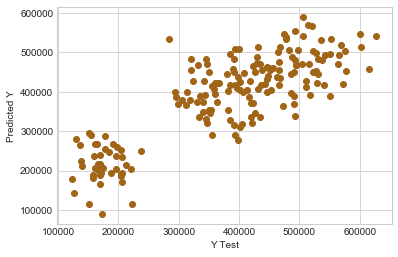

In [88]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-Squared** (r^2 score) is the amount of variation in y, explained by x values

R^2 = 1 - (Sum of Squares of Residuals \ Sum of Squares of Total Error)

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R-Squared** is the preferred value which denotes the model performance as a fraction.

All of these are **loss functions**, because we want to minimize them.

In [97]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# The below are the cost fucntions which measures the error in the model 
#MAE: 31026.5105552
#MSE: 1496796728.08
# RMSE: 38688.4572
# RMSE value i.e error value is high 72504.64715879827 over the previous one 38688.4572  becuase we have not considered the other variables 

MAE: 58705.941701155054
MSE: 5256923859.621834
RMSE: 72504.64715879827


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


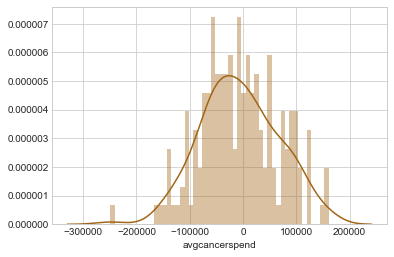

In [98]:
sns.distplot((y_test-predictions),bins=50);

#  How the residual are left in the model ( Differemnce between actual and predicted aew called resudial in the model Residuals of the model must als be normaly distibuted )

In [104]:
#coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients = pd.DataFrame(lm1.coef_,X1.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

# HOW TO  interpret coeffccient values ( beta 1 -0.480242  )

,Coeffecient
percapgdp,11.247659


** How can you interpret these coefficients? **

** There exists multicollinearity between variables which is the reason for negative coefficient for percapgdp variable **

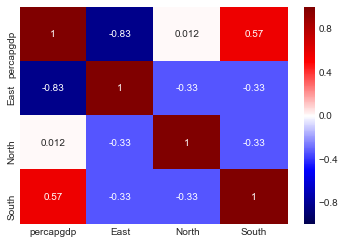

In [107]:
sns.heatmap(insurance[['percapgdp', 'East', 'North', 'South']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

In [109]:
r_squared = metrics.r2_score(y_test,predictions)

r_squared

# r2_score  used for Y test 

0.6947298827584087

Now, perform a simple linear regression between percpgdp and Average cancer spend to find the coefficient value.